<a href="https://colab.research.google.com/github/NurulAthira26/-IMPLEMENTING-LINEAR-REGRESSION-USING-PYTHON/blob/main/visualization4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[1]]


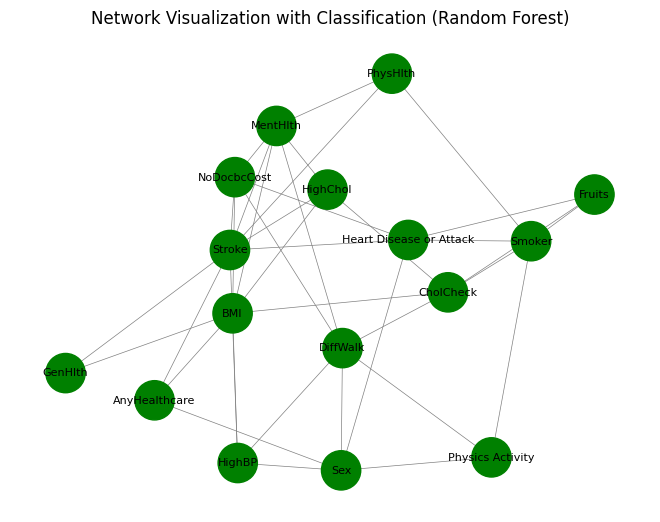

In [ ]:
#this is classification visualization using random forest classifier
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#  DataFrame
df = pd.DataFrame({
    'Diabetes_binary': [0.0, 0.0, 0.0, 0.0, 0.0],
    'HighBP': [1.0, 1.0, 0.0, 1.0, 0.0],
    'HighChol': [0.0, 1.0, 0.0, 1.0, 0.0],
    'CholCheck': [1.0, 1.0, 1.0, 1.0, 1.0],
    'BMI': [26.0, 26.0, 26.0, 28.0, 29.0],
    'Smoker': [0.0, 1.0, 0.0, 1.0, 1.0],
    'Stroke': [0.0, 1.0, 0.0, 0.0, 0.0],
    'Heart Disease or Attack': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Physics Activity': [1.0, 0.0, 1.0, 1.0, 1.0],
    'Fruits': [0.0, 1.0, 1.0, 1.0, 1.0],
    'AnyHealthcare': [1.0, 1.0, 1.0, 1.0, 1.0],
    'NoDocbcCost': [0.0, 0.0, 0.0, 0.0, 0.0],
    'GenHlth': [3.0, 3.0, 1.0, 3.0, 2.0],
    'MentHlth': [5.0, 0.0, 0.0, 0.0, 0.0],
    'PhysHlth': [30.0, 0.0, 10.0, 3.0, 0.0],
    'DiffWalk': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Sex': [1.0, 1.0, 1.0, 1.0, 0.0],
    'Age': [4.0, 12.0, 13.0, 11.0, 8.0],
    'Education': [6.0, 6.0, 6.0, 6.0, 5.0],
    'Income': [8.0, 8.0, 8.0, 8.0, 8.0]
})

# Extracting relevant columns for network visualization
columns_for_network = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Heart Disease or Attack',
                        'Physics Activity', 'Fruits', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth',
                        'PhysHlth', 'DiffWalk', 'Sex']

# Binary classification target
y = df['Diabetes_binary']

# Features for the model
X = df[columns_for_network]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Assess the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)  # Set zero_division=1 to avoid warning
recall = recall_score(y_test, y_pred, zero_division=1)  # Set zero_division=1 to avoid warning
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

# Create a graph
G = nx.Graph()

# Add nodes to the graph with color coding based on actual and predicted classes
for node in columns_for_network:
    if node in X_test.columns:
        actual_class = int(y_test.iloc[0])  # Assuming y_test has only one unique value
        predicted_class = int(y_pred[0])
        color = 'green' if actual_class == predicted_class else 'red'
        G.add_node(node, color=color)

# Randomly add edges (for demonstration purposes)
for node1 in columns_for_network:
    for node2 in columns_for_network:
        if node1 != node2 and np.random.rand() > 0.8:
            G.add_edge(node1, node2)

# Draw the graph with color-coded nodes
pos = nx.spring_layout(G)
node_colors = [G.nodes[node]['color'] for node in G.nodes]
nx.draw(G, pos, with_labels=True, font_size=8, node_size=800, font_color='black', node_color=node_colors, edge_color='gray', width=0.5)
plt.title('Network Visualization with Classification (Random Forest)')
plt.show()
